In [1]:
import bokeh.io
from bokeh.palettes import Category20c
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.transform import cumsum
from math import pi
from pyproj import Proj
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
import pandas as pd

In [2]:
df=pd.read_csv("visualdata.csv")
df.shape

(1137049, 26)

In [3]:
df.head()

,County_pop,City_pop,State_pop,ZIP,Model_Year,Make,Model,Electric_Vehicle_Type,Vehicle_Location,is_valid_us_zip_x,...,Station_Phone,Access_Days_Time,Cards_Accepted,Latitude,Longitude,Open_Date,EV_Connector_Types,Access_Code,is_valid_us_zip_y,Full_name
0,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),-81.80023 24.5545,True,...,954-345-2200 877-798-3752,24 hours daily; for member use only,NaN,26.261890,-80.265841,2017-09-01,J1772 TESLA,public,True,Florida
1,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),-81.80023 24.5545,True,...,800-328-9815 877-798-3752,24 hours daily; for customer use only; see val...,NaN,24.560730,-81.806606,2015-04-01,TESLA,public,True,Florida
2,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),-81.80023 24.5545,True,...,305-296-4600 877-798-3752,24 hours daily; for customer use only; see fro...,NaN,24.561138,-81.806112,2015-04-01,J1772 TESLA,public,True,Florida
3,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),-81.80023 24.5545,True,...,800-845-8384 877-798-3752,24 hours daily; for customer use only,NaN,24.550549,-81.799435,2017-03-01,TESLA,public,True,Florida
4,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),-81.80023 24.5545,True,...,305-501-5193 877-798-3752,24 hours daily; for customer use only; see fro...,NaN,24.560402,-81.801832,2017-03-01,J1772 TESLA,public,True,Florida


In [4]:
# Group the data by station and car model and count the number of records in each group
grouped_data = df.groupby(['Station_Name', 'Model'])['State_pop'].count().reset_index()
grouped_data.head()

,Station_Name,Model,State_pop
0,"1 Columbia Investment, LLC",MODEL 3,3
1,"10 G Street, NE",C-MAX,1
2,"10 G Street, NE",LEAF,1
3,100 Oceangate,VOLT,1
4,1007 Stewart Street,330E,5


In [11]:
zip_dataframe = df.groupby(['State'])['Model'].count().reset_index()
zip_dataframe.head()

,State,Model
0,AK,1
1,AL,1
2,AR,3
3,AZ,269
4,CA,1946


In [12]:
zip_dataframe = df.groupby(['State'])['Station_Name'].count().reset_index()
zip_dataframe.head()

,State,Station_Name
0,AK,1
1,AL,1
2,AR,3
3,AZ,269
4,CA,1946


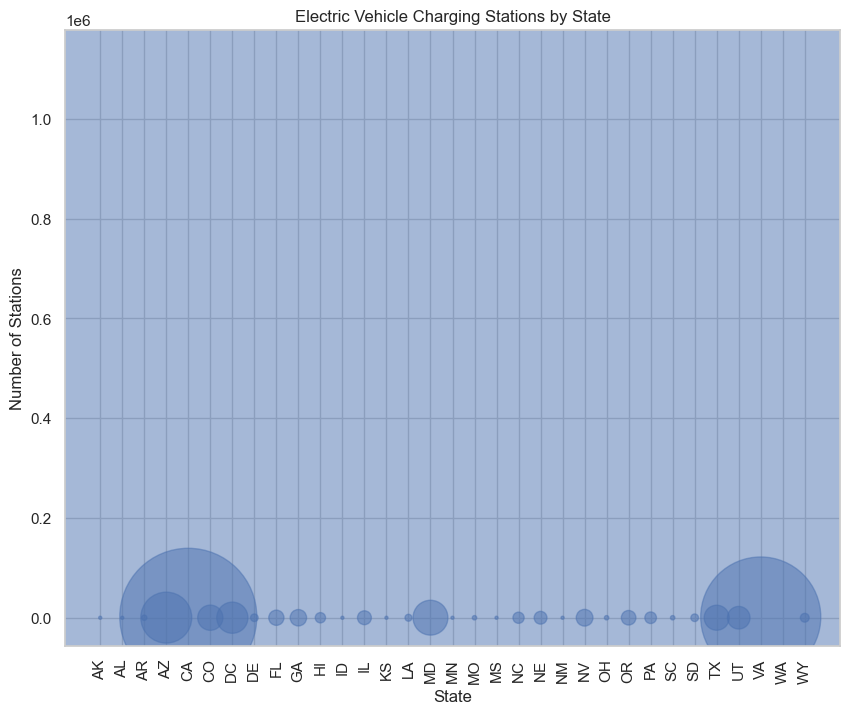

In [51]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(x=zip_dataframe['State'], y=zip_dataframe['Station_Name'], s=zip_dataframe['Station_Name']*5, alpha=0.5)
plt.xlabel('State')
plt.ylabel('Number of Stations')
plt.title('Electric Vehicle Charging Stations by State')
plt.xticks(rotation=90)
plt.show()

In [52]:
df_va = df[df['State'] == 'VA']

# group the data by ZIP code and count the number of stations in each ZIP
zip_counts = df_va.groupby(['ZIP'])['Station_Name'].count()

# print the resulting count of stations by ZIP code
print(zip_counts)

ZIP
20171      11
22015       1
22180       5
22203      11
22304      28
22314      51
22405       1
22554       6
23321       9
23462       4
23464       2
23503       2
23517       1
23518      14
23602       8
24541       4
99354    1337
Name: Station_Name, dtype: int64


In [53]:
df_va = df[df['State'] == 'VA']

# group the data by ZIP code and count the number of stations in each ZIP
zip_counts = df_va.groupby(['ZIP'])['Make'].count()

# print the resulting count of stations by ZIP code
print(zip_counts)

ZIP
20171      11
22015       1
22180       5
22203      11
22304      28
22314      51
22405       1
22554       6
23321       9
23462       4
23464       2
23503       2
23517       1
23518      14
23602       8
24541       4
99354    1337
Name: Make, dtype: int64


In [54]:
import math

# vehicle location (latitude and longitude)
vehicle_lat = "Latitude_pop"
vehicle_lon = "Longitude_pop"

# charging station location (latitude and longitude)
station_lat = "Latitude"
station_lon = "Longitude"

df['Lat'] = math.radians(df['Latitude'] - df['Latitude_pop'])
df['Long'] = math.radians(df['Longitude'] - df['Longitude_pop'])
# calculate distance for each row and append to distances list
for index, row in df.iterrows():
    station_lat = row['Latitude']
    station_lon = row['Longitude']
    
    # calculate distance using Haversine formula
    earth_radius = 6371
    delta_lat = math.radians(station_lat - vehicle_lat)
    delta_lon = math.radians(station_lon - vehicle_lon)
    a = (math.sin(delta_lat / 2) ** 2) + (math.cos(math.radians(vehicle_lat)) * math.cos(math.radians(station_lat)) * (math.sin(delta_lon / 2) ** 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance_km = earth_radius * c
    
    distances.append(distance_km)

# add distances list as new column to DataFrame
df['Distance_km'] = distances

TypeError: unsupported operand type(s) for -: 'float' and 'str'

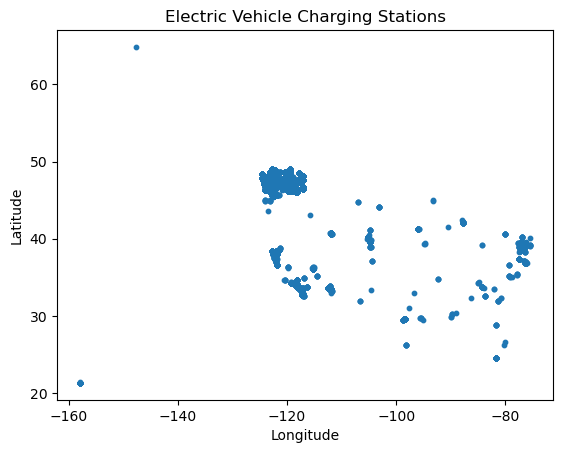

In [5]:
latitudes = df['Latitude']
longitudes = df['Longitude']

# Create a scatter plot
plt.scatter(longitudes, latitudes, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Electric Vehicle Charging Stations')

# Show the plot
plt.show()

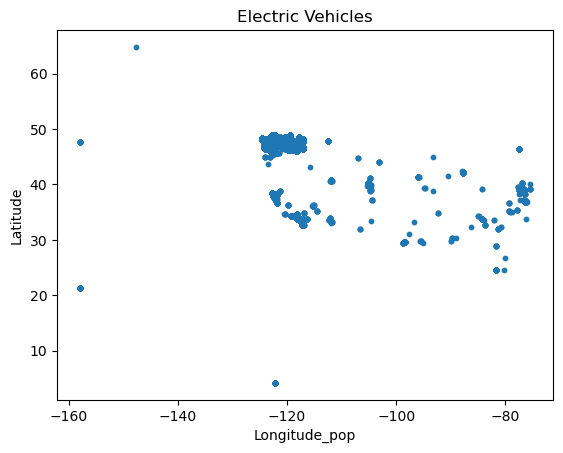

In [6]:
latitudes = df['Latitude_pop']
longitudes = df['Longitude']

# Create a scatter plot
plt.scatter(longitudes, latitudes, s=10)
plt.xlabel('Longitude_pop')
plt.ylabel('Latitude')
plt.title('Electric Vehicles')

# Show the plot
plt.show()

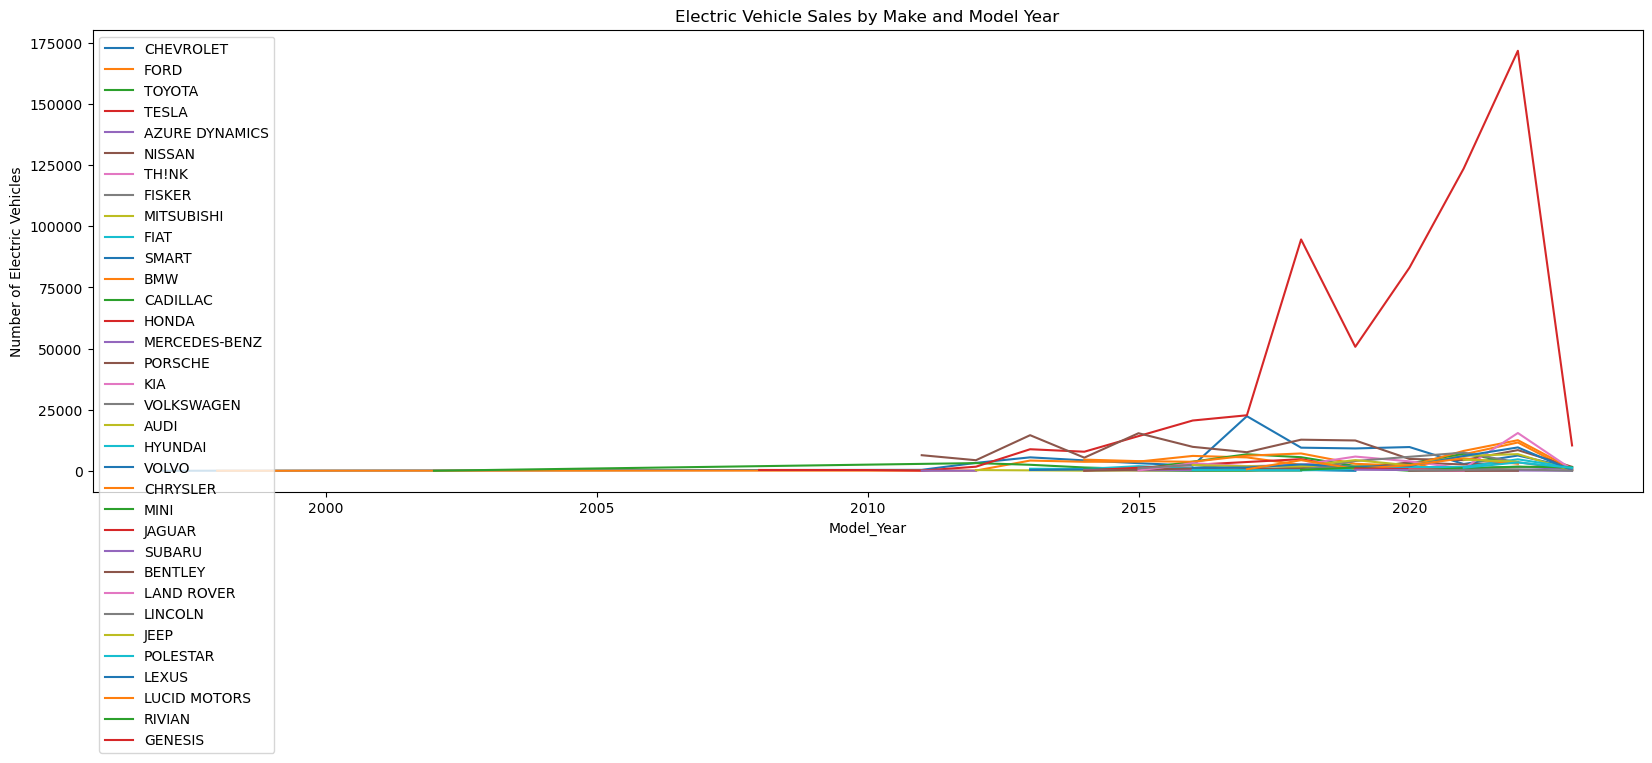

In [15]:
# Group by Model Year and Make
grouped_data = df.groupby(['Model_Year', 'Make']).size().reset_index(name='count')

# Create line chart
fig, ax = plt.subplots(figsize=(20, 6))

for make in grouped_data['Make'].unique():
    make_data = grouped_data[grouped_data['Make'] == make]
    ax.plot(make_data['Model_Year'], make_data['count'], label=make)

ax.legend()
ax.set_xlabel("Model_Year")
ax.set_ylabel("Number of Electric Vehicles")
ax.set_title("Electric Vehicle Sales by Make and Model Year")

plt.show()

In [28]:
pie_data = df.groupby(['State', 'Electric_Vehicle_Type']).size().reset_index(name='count')
pie_data.head()


,State,Electric_Vehicle_Type,count
0,AK,Plug-in Hybrid Electric Vehicle (PHEV),1
1,AL,Plug-in Hybrid Electric Vehicle (PHEV),1
2,AR,Battery Electric Vehicle (BEV),3
3,AZ,Battery Electric Vehicle (BEV),169
4,AZ,Plug-in Hybrid Electric Vehicle (PHEV),100


In [29]:
print(pie_data)

   State                   Electric_Vehicle_Type   count
0     AK  Plug-in Hybrid Electric Vehicle (PHEV)       1
1     AL  Plug-in Hybrid Electric Vehicle (PHEV)       1
2     AR          Battery Electric Vehicle (BEV)       3
3     AZ          Battery Electric Vehicle (BEV)     169
4     AZ  Plug-in Hybrid Electric Vehicle (PHEV)     100
5     CA          Battery Electric Vehicle (BEV)    1311
6     CA  Plug-in Hybrid Electric Vehicle (PHEV)     635
7     CO          Battery Electric Vehicle (BEV)      46
8     CO  Plug-in Hybrid Electric Vehicle (PHEV)      20
9     DC          Battery Electric Vehicle (BEV)      53
10    DC  Plug-in Hybrid Electric Vehicle (PHEV)      48
11    DE          Battery Electric Vehicle (BEV)       6
12    FL          Battery Electric Vehicle (BEV)       6
13    FL  Plug-in Hybrid Electric Vehicle (PHEV)      18
14    GA          Battery Electric Vehicle (BEV)      18
15    GA  Plug-in Hybrid Electric Vehicle (PHEV)      10
16    HI          Battery Elect

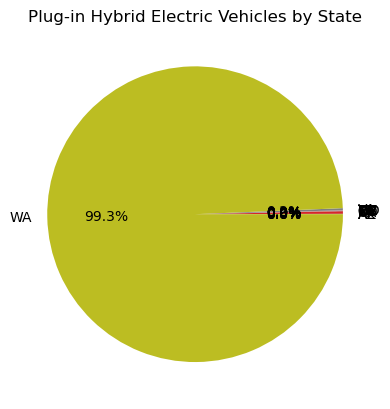

In [31]:
phev_data = df[df['Electric_Vehicle_Type'] == "Plug-in Hybrid Electric Vehicle (PHEV)"]

# Group by State and count the number of PHEVs in each state
grouped_data = phev_data.groupby('State').size().reset_index(name='count')

# Create pie chart
counts = grouped_data['count'].tolist()
states = grouped_data['State'].tolist()

fig, ax = plt.subplots()
ax.pie(counts, labels=states, autopct='%1.1f%%')
ax.set_title("Plug-in Hybrid Electric Vehicles by State")
plt.show()

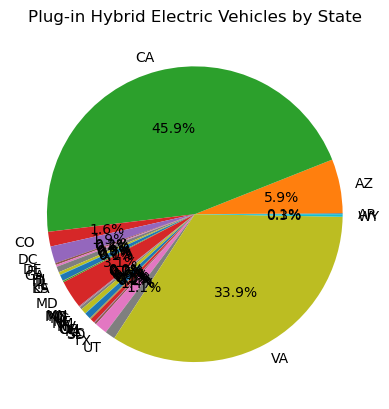

In [36]:
phev_data = df[(df['Electric_Vehicle_Type'] == "Battery Electric Vehicle (BEV)") & (df['State'] != "WA")]

# Group by State and count the number of PHEVs in each state
grouped_data = phev_data.groupby('State').size().reset_index(name='count')

# Create pie chart
counts = grouped_data['count'].tolist()
states = grouped_data['State'].tolist()

fig, ax = plt.subplots()
ax.pie(counts, labels=states, autopct='%1.1f%%')
ax.set_title("Plug-in Hybrid Electric Vehicles by State")
plt.show()

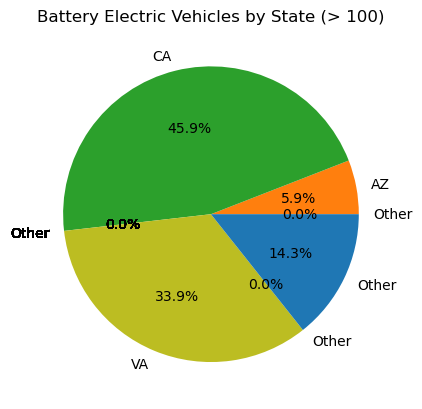

In [47]:
phev_data = df[(df['Electric_Vehicle_Type'] == "Battery Electric Vehicle (BEV)") & (df['State'] != "WA")]


# Group by State and count the number of PHEVs in each state
grouped_data = phev_data.groupby('State').size().reset_index(name='count')

# Create pie chart with categories that have a count >= 100 and group all others into "Other" category
counts = grouped_data['count'].tolist()
states = grouped_data['State'].tolist()

other_count = 0
for i, count in enumerate(counts):
    if count < 100:
        other_count += count
        counts[i] = 0
        states[i] = "Other"

counts.append(other_count)
states.append("Other")

fig, ax = plt.subplots()
ax.pie(counts, labels=states, autopct='%1.1f%%')
ax.set_title("Battery Electric Vehicles by State (> 100)")
plt.show()


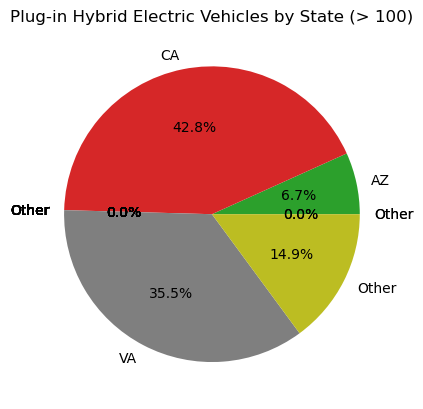

In [39]:
phev_data = df[(df['Electric_Vehicle_Type'] == "Plug-in Hybrid Electric Vehicle (PHEV)") & (df['State'] != "WA")]

# Group by State and count the number of PHEVs in each state
grouped_data = phev_data.groupby('State').size().reset_index(name='count')

# Create pie chart with categories that have a count >= 100 and group all others into "Other" category
counts = grouped_data['count'].tolist()
states = grouped_data['State'].tolist()

other_count = 0
for i, count in enumerate(counts):
    if count < 100:
        other_count += count
        counts[i] = 0
        states[i] = "Other"

counts.append(other_count)
states.append("Other")

fig, ax = plt.subplots()
ax.pie(counts, labels=states, autopct='%1.1f%%')
ax.set_title("Plug-in Hybrid Electric Vehicles by State (> 100)")
plt.show()


In [61]:
df_vehicle=pd.read_csv("ev_vehicle_population.csv")
df_vehicle.shape

(112634, 18)